# DSA Assignment 2 - due 5th May
-----
by Judith Smolenski and Jianyun Wu
## __Part 1 - Sorting Algorithms__

## 1.1 set up/implement the following sorting algorithms
1. Bubble Sort
2. Quick Sort
3. Merge Sort


In [1]:
class Sort:
    @staticmethod
    def bubble_sort(arr):
        arr_size = len(arr)
        for i in range(arr_size):
            for j in range(i, arr_size):
                if arr[i] > arr[j]:
                    arr[i], arr[j] = arr[j], arr[i]
        return arr

    @staticmethod
    def partition(arr, low, high):
        """Return a pivot element for Quicksort."""
        key = arr[high]
        pivot = low
        for i in range(low, high):
            if arr[i] <= key:
                arr[i], arr[pivot] = arr[pivot], arr[i]
                pivot += 1

        arr[pivot], arr[high] = arr[high], arr[pivot]
        return pivot

    @staticmethod
    def quicksort(arr, low=0, high=None):
        if high is None:
            high = len(arr) - 1

        if high < low:
            return
        else:
            pivot = Sort.partition(arr, low, high)
            Sort.quicksort(arr, low, pivot - 1)
            Sort.quicksort(arr, pivot + 1, high)

    @staticmethod
    def quick_sort_simple(arr):
        if len(arr) > 1:
            less = []
            equal = []
            greater = []
            pivot = arr[0]

            for x in arr:
                if x < pivot:
                    less.append(x)
                elif x == pivot:
                    equal.append(x)
                else:
                    greater.append(x)

            return Sort.quick_sort_simple(less) + equal + Sort.quick_sort_simple(greater)

        else:
            return arr

    @staticmethod
    def merge(left, right):
        result = []
        left_idx, right_idx = 0, 0
        while left_idx < len(left) and right_idx < len(right):
            if left[left_idx] <= right[right_idx]:
                result.append(left[left_idx])
                left_idx += 1
            else:
                result.append(right[right_idx])
                right_idx += 1

        if left:
            result.extend(left[left_idx:])
        if right:
            result.extend(right[right_idx:])
        return result

    @staticmethod
    def mergesort(arr):
        if len(arr) <= 1:
            return arr

        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]

        left = Sort.mergesort(left)
        right = Sort.mergesort(right)
        return list(Sort.merge(left, right))

Unit testing for Sorting Algorithms above to ensure they are working corretly. Using pythons inbuilt sorted() function as a control.

In [2]:
import unittest
sort = Sort

class SortingTest(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super(SortingTest, self).__init__(*args, **kwargs)
        self.test_arr = [[1], [1, 2], [2, 1], [5, 3, 9, 1, 12], [1, 3, 5, 9, 12],
                [10, 343, 100, -87, 980, 877754, 98124, 0, 1000000, -100]]
        self.test_text_arr = [['horse','eagle','fish','elephant'],['London','Sydney','Montreal']]

    def test_bubble_sort(self):
        """Test bubble sort."""
        for arr in self.test_arr:
            self.assertEqual(sorted(arr), sort.bubble_sort(arr))

    def test_quick_sort_inplace(self):
        for arr in self.test_arr:
            sort.quicksort(arr)
            self.assertEqual(arr, sorted(arr))
            
    def test_merge_sort(self):
        for arr in self.test_arr:
            self.assertEqual(sort.mergesort(arr), sorted(arr))

    def test_merge_text_sort(self):
        for arr in self.test_text_arr:
            print(sort.mergesort(arr))
            self.assertEqual(sort.mergesort(arr), sorted(arr))                 
            
if __name__ == '__main__':
    unittest.main(argv=['ignored', '-v'], exit=False)

test_bubble_sort (__main__.SortingTest.test_bubble_sort)
Test bubble sort. ... ok
test_merge_sort (__main__.SortingTest.test_merge_sort) ... ok
test_merge_text_sort (__main__.SortingTest.test_merge_text_sort) ... ok
test_quick_sort_inplace (__main__.SortingTest.test_quick_sort_inplace) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


['eagle', 'elephant', 'fish', 'horse']
['London', 'Montreal', 'Sydney']


## 1.2 Create reverse order List inputs for the algorithms to compute runtimes


In [3]:
import time
Sort = Sort

class SortRunTimes:
    TIME_UNIT_SCALE = pow(10, 6)  # record time in micro-seconds

    def __init__(self, list_count=20, min_list_size=50, list_size_increments=5, repeat=10):
        # create list_count number of lists in descending order
        self.lists_to_sort = []
        cur_list_size = min_list_size
        for i in range(list_count):
            self.lists_to_sort.append([*range(cur_list_size, 0, -1)])
            cur_list_size += list_size_increments

        # methods is a dictionary of sort methods {sort_name: method}
        # runtimes is a dictionary of dictionaries - {method_name: {input : runtime} }
        self.sort_methods = {
            "bubble sort": Sort.bubble_sort,
            "quick sort": Sort.quick_sort_simple,
            "merge sort": Sort.mergesort
        }
        self.runtimes = dict()
        for sort_name in self.sort_methods.keys():
            self.runtimes[sort_name] = dict()

        self.repeat = repeat

        # start recording sort run times
        self.record_runtimes()

    def record_runtimes(self):
        for sort_name in self.sort_methods.keys():
            # for each sort method, run it on each descending list for repeat times
            # record total time, average and save to self.runtimes
            sort = self.sort_methods[sort_name]
            for list_to_sort in self.lists_to_sort:
                time_bgn = time.time()
                for i in range(self.repeat):
                    sort(list_to_sort)
                avg_time = (time.time() - time_bgn) / self.repeat
                self.runtimes[sort_name][len(list_to_sort)] = avg_time * self.TIME_UNIT_SCALE

    def get_runtimes(self):
        return self.runtimes


def test_sort_run_times():
    sort_runt_times = SortRunTimes()
    for sort_runtime in sort_runt_times.get_runtimes().items():
        print(sort_runtime)


test_sort_run_times()

('bubble sort', {50: 60.272216796875, 55: 111.29379272460938, 60: 83.30345153808594, 65: 95.29590606689453, 70: 110.98384857177734, 75: 126.21879577636719, 80: 140.40470123291016, 85: 178.0986785888672, 90: 182.2948455810547, 95: 195.40786743164062, 100: 226.3784408569336, 105: 237.1072769165039, 110: 284.6956253051758, 115: 287.4135971069336, 120: 321.2928771972656, 125: 335.71720123291016, 130: 371.8137741088867, 135: 415.49205780029297, 140: 411.5104675292969, 145: 452.0893096923828})
('quick sort', {50: 99.7781753540039, 55: 111.10305786132812, 60: 133.87203216552734, 65: 177.69336700439453, 70: 176.00059509277344, 75: 208.52088928222656, 80: 227.9043197631836, 85: 253.10516357421872, 90: 310.58788299560547, 95: 321.98429107666016, 100: 371.52767181396484, 105: 386.78646087646484, 110: 430.8938980102539, 115: 476.00269317626953, 120: 508.80908966064453, 125: 545.191764831543, 130: 585.1030349731445, 135: 627.8038024902344, 140: 676.7034530639648, 145: 725.9845733642578})
('merge so

## 1.3 Plot running times as a function of x for the three algorithms using the created lists

bubble sort : running_time = 0.0 * n^2 + 25.4


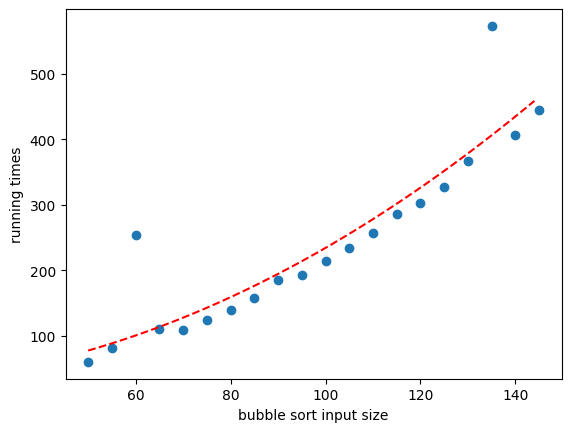

quick sort : running_time = log(624.1 * n) + -2458.3


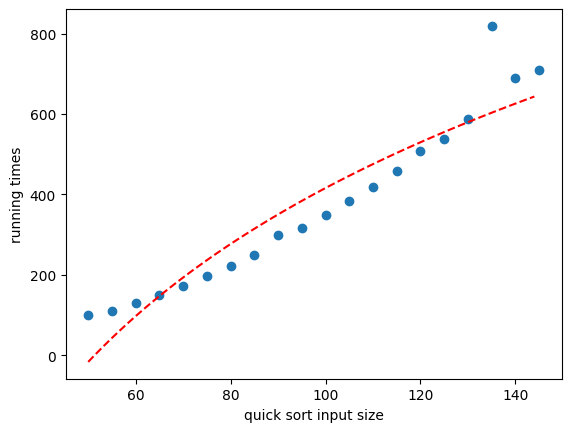

merge sort : running_time = log(149.6 * n) + -552.8


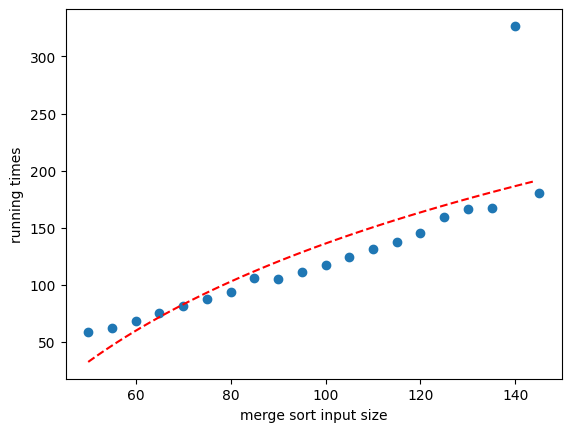

In [4]:
SortRunTimes = SortRunTimes
from numpy import log, arange
from scipy.optimize import curve_fit
from matplotlib import pyplot


class SortPlots:
    BUBBLE_SORT = "bubble sort"

    def __init__(self, runtimes: SortRunTimes):
        # get {method_name: {input: runtime} } dictionary from SortRunTimes class
        self.sort_run_times = runtimes.get_runtimes()
        # dictionary: {method_name: [a, b]} - where a & b are the fitted parameters
        self.fitted_parameters = dict()
        self.fit_curve()

    @staticmethod
    def square_objective(x, a, b):
        return a * x * x + b

    @staticmethod
    def linearithmic_objective(x, a, b):
        return a * log(x) + b

    def fit_curve(self):
        for sort_name in self.sort_run_times.keys():
            runtimes = self.sort_run_times[sort_name]
            # x_data and y_data for fitting
            input_size, runtime = list(runtimes.keys()), list(runtimes.values())
            # get fitted parameter after regression:
            if sort_name == self.BUBBLE_SORT:
                objective = SortPlots.square_objective
            else:
                objective = SortPlots.linearithmic_objective
            fitted_parameters, covariance = curve_fit(objective, input_size, runtime)
            self.fitted_parameters[sort_name] = fitted_parameters

    def draw_plots(self):
        for sort_name in self.sort_run_times.keys():
            runtime_dict = self.sort_run_times[sort_name]
            # x_data and y_data for scatter plots
            input_sizes, runtime_dict = list(runtime_dict.keys()), list(runtime_dict.values())
            pyplot.scatter(input_sizes, runtime_dict)
            # draw fitted curve
            parameters = self.fitted_parameters[sort_name]
            # draw regression line
            x_line = arange(min(input_sizes), max(input_sizes), 1)
            if sort_name == self.BUBBLE_SORT:
                objective = SortPlots.square_objective
                # print fitted objective function with 1 decimal precision ( running time in nano seconds)
                print(sort_name, ': running_time = %.1f * n^2 + %.1f' % (parameters[0], parameters[1]))
            else:
                objective = SortPlots.linearithmic_objective
                print(sort_name, ': running_time = log(%.1f * n) + %.1f' % (parameters[0], parameters[1]))
            y_line = objective(x_line, *parameters)
            pyplot.xlabel(sort_name + " input size")
            pyplot.ylabel("running times")
            pyplot.plot(x_line, y_line, '--', color='red')
            pyplot.show()


def draw_plot_test():
    sort_run_times = SortRunTimes()
    search_plots = SortPlots(sort_run_times)
    search_plots.draw_plots()


draw_plot_test()

## Discussion of the runtimes of the three sorting algorithms
### General Information about the different algorithms
__Bubble Sort__: O(n^2): as input size increases the time taken increases exponentially. Not suitable for large datasets
<br>__Merge Sort__: O(nlogn): reliable and stable for smaller and larger datasets alike but requires extra storage
<br>__Quick Sort__: average = O(nlogn), worst = O(n^2): great for random distributions of data, but not great if data is nearly sorted
<br>

### Looking at the plots above
1. In the bubble sort plot you can begin to see the exponential tendency develop as the input size is increased, proving the rule that bubble sort has limited use in practice despite being very useful for small datasets. It features the best runtimes for small size inputs of the three algorithms in the tests provided, however this is not a hard and fast rule of the bubble sort algorithm as all sorting algorithms are quicker when input is smaller.
2. Merge and Quick sort are more similar in their performance overall with both having a steady increase which is beginning to show the tendency to even out as input get bigger.
3. nb. Given the specific requirement of a reverse-order sorted list as input, the best performance times were not achieved for any of the algorithms.


## __Part 2: Shortes Path and Graphs - Djikstra__

## compute the shortest path tree

In [57]:
import networkx as nx
import matplotlib.pyplot as plt


class Dijkstra:
    def __init__(self):
        self.graph = nx.Graph()
        edges = [('A', 'B', 5),
                 ('A', 'H', 8),
                 ('A', 'E', 9),
                 ('B', 'D', 15),
                 ('B', 'C', 12),
                 ('B', 'H', 4),
                 ('H', 'E', 5),
                 ('H', 'F', 6),
                 ('H', 'C', 7),
                 ('E', 'F', 4),
                 ('E', 'G', 20),
                 ('C', 'D', 3),
                 ('C', 'F', 1),
                 ('C', 'G', 11),
                 ('F', 'G', 13),
                 ('D', 'G', 9)]
        self.graph.add_weighted_edges_from(edges)

    def draw_G(self):
        Dijkstra.draw_graph(self.graph, "All nodes and connections")

    @staticmethod
    def draw_graph(graph, title):
        positions = nx.spring_layout(graph)
        nx.draw_networkx_nodes(graph, positions, node_size=900, alpha=.9, node_color='#7d7dba')
        nx.draw_networkx_edges(graph, positions, width=2, alpha=.5, edge_color='k', style='dashed')
        nx.draw_networkx_labels(graph, positions, font_size=15, font_color='white')
        edge_weight_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=edge_weight_labels)
        plt.title(title)
        plt.show()

    def find_path_between_A_and_G(self):
        path = nx.dijkstra_path(self.graph, 'A', 'G')
        print(path)

    def shortest_path_tree(self):
        shortest_paths = nx.single_source_dijkstra_path(self.graph, 'A')
        shortest_path_tree = nx.Graph()
        for path in shortest_paths.values():
            for i in range(1, len(path)):
                source = path[i - 1]
                target = path[i]
                weight = self.graph.get_edge_data(source, target)['weight']
                shortest_path_tree.add_edge(source, target, weight=weight)
        Dijkstra.draw_graph(shortest_path_tree, "Dijkstra's Shortest Path")


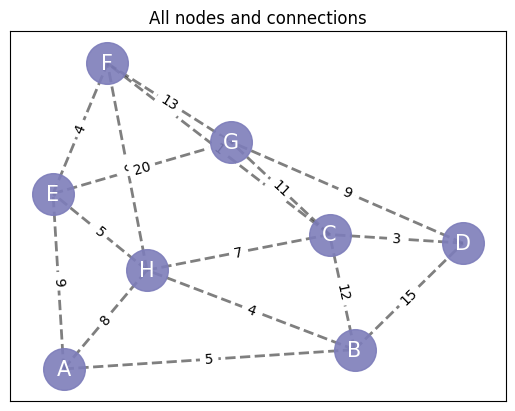

In [58]:
def test_dijkstra_G():
    dijkstra = Dijkstra()
    dijkstra.draw_G()
    
test_dijkstra_G()

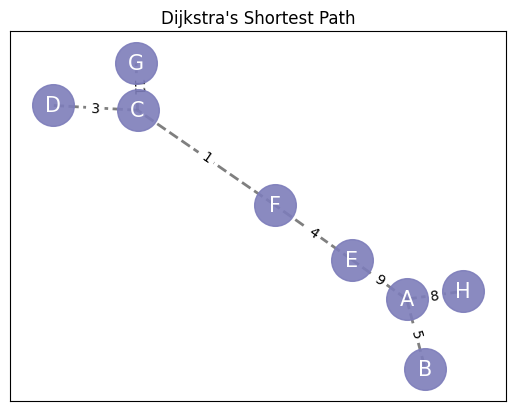

In [59]:
def test_dijkstra():
    dijkstra = Dijkstra()
    dijkstra.shortest_path_tree()

test_dijkstra()

## __Part 3: Shortes Path and Graphs - Prim__


In [48]:
class Prim:
    def __init__(self):
        self.graph = nx.Graph()
        edges = [('1','2', 240),
                ('1','3', 210),
                ('1','4',340),
                ('1','5',280),
                ('1','6',200),
                ('1','7',345),
                ('1','8',120),
                ('2','3',265),
                ('2','4',175),
                ('2','5',215),
                ('2','6',180),
                ('2','7',185),
                ('2','8',155),
                ('3','4',260),
                ('3','5',115),
                ('3','6',350),
                ('3','7',435),
                ('3','8',195),
                ('4','5',160),
                ('4','6',330),
                ('4','7',295),
                ('4','8',230),
                ('5','6',360),
                ('5','7',400),
                ('5','8',170),
                ('6','7',175),
                ('6','8',205),
                ('7','8',305)]
        self.graph.add_weighted_edges_from(edges)
    
    def draw_G(self):
        Prim.draw_graph(self.graph, "All Islands and Connections")

    def draw_graph(graph, title):
        positions = nx.spring_layout(graph)
        nx.draw_networkx_nodes(graph, positions, node_size=900, alpha=.9, node_color='#ffd769')
        nx.draw_networkx_edges(graph, positions, width=1, alpha=.5, edge_color='k', style='solid')
        nx.draw_networkx_labels(graph, positions, font_size=15, font_color='white')
        edge_weight_labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=edge_weight_labels)
        plt.title(title)
        plt.show()
    
    def get_minimum_spanning_tree(self):
        T = nx.minimum_spanning_tree(self.graph, algorithm='prim')
        Prim.draw_graph(T, "Minimum Spanning Tree")


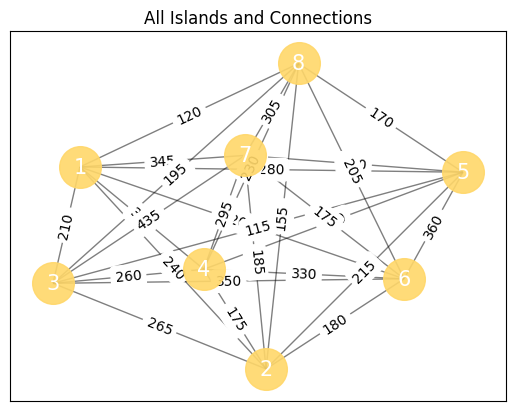

In [49]:
def test_prim_G():
    prim = Prim()
    prim.draw_G()

test_prim_G()

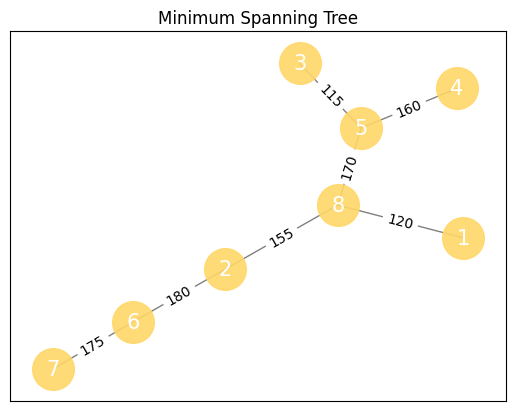

In [50]:
def test_prim():
    prim = Prim()
    prim.get_minimum_spanning_tree()

test_prim()